## Elementarströmungen 1

Durch die Linearität der Laplace-Gleichung lassen sich Lösungen dieser Differentialgleichung, also Lösungen von Potentialströmungen, linear überlagern. Es ist also sinnvoll, sich zunächst einfache elementare Strömungen genauer anzuschauen, die dann später zu komplexeren Strömungen bis hin zu beliebigen Profilumströmungen überlagern lassen.

### Translationsströmung (homogene Strömung)

Die einfachste dieser Elementarströmungen ist die Translationsströmung oder auch homogene Strömung, bei der alle Geschwindigkeitsvektoren in die gleiche Richtung zeigen:

$$
\overrightarrow{v}
=
\begin{pmatrix}
    u_1 \\
    v_1 \\
\end{pmatrix} = const.$$

![](translationsstroemung.png)

Da mit der Definition des Potentials

$$u=\frac{\partial \phi}{\partial x} \qquad \text{und} \qquad v=\frac{\partial \phi}{\partial y}$$

erhält man die Potentialfunktion durch Integration von $u$ und $v$:

$$\phi = u_1~x + c(y) \qquad \text{und} \qquad \phi = v_1~y + c(x)$$

durch Vergleich der beiden letzten Gleichungen wird klar, dass die "Integrationskonstanten" $c(x) = u_1 x$ und $c(y) = v_1 y$ sein müssen. Damit ist die Potentialfunktion der Translationsströmung:

$$\phi = u_1~x + v_1~y$$

Mit der gleichen Vorgehensweise erhält man auch die Stromfunktion:

$$\psi = -v_1~x + u_1~y$$

Die letzte Gleichung kann umgeformt werden, um eine Gleichung für die Stromlinie zu erhalten:

$$y(x) = \frac{\psi}{u_1} + \frac{v_1}{u_1}x$$

### Quellen- und Senkenströmung

Unter einer Quellen- oder Senkenströmung versteht man die radiale Strömung aus einer Quelle oder in eine Senke, die im Ursprung des Koordinatensystems liegt.

![](quellenstroemung.png)

Im Falle einer Quellenströmung zeigen die Geschwindigkeitsvektoren alle radial vom Ursprung der Quelle weg. Der Betrag der Geschwindigkeit nimmt mit zunehmendem Abstand ab, da sich der Volumenstrom $Q$ (in 2D der Volumenstrom pro Tiefeneinheit, damit die Einheiten stimmen), der aus dem Ursprung austritt auf eine immer größere Kreisfläche verteilt. In Polarkoordinaten folgt dann für den Geschwindigkeitsvektor, der immer in radialer Richtung zeigt:

$$\overrightarrow{v} = \frac{Q}{2\pi r} 
\begin{pmatrix}
1 \\
0
\end{pmatrix}_{r,\varphi}$$

Dabei handelt es sich für positive Werte von $Q$ um eine Quelle und für negative Werte um eine Senke. In kartesischen Koordinaten wird mit $r=\sqrt{x^2+y^2}$ daraus:

$$\overrightarrow{v} = \frac{Q}{2\pi\left(x^2+y^2\right)}
\begin{pmatrix}
x \\
y
\end{pmatrix}_{x,y}$$

Durch Integration von

$$\frac{\partial \phi}{\partial x} = u = \frac{Q}{2\pi} \frac{x}{x^2+y^2}$$
und 
$$\frac{\partial \phi}{\partial y} = v = \frac{Q}{2\pi} \frac{y}{x^2+y^2}$$

findet man - wie bei der Translationsströmung - die Potentialfunktion

$$\phi = \frac{Q}{2\pi} \text{ln} \sqrt{x^2+y^2} + c(y)$$

$$\phi = \frac{Q}{2\pi} \text{ln} \sqrt{x^2+y^2} + c(x)$$

Durch Vergleich der beiden Gleichungen wird klar, dass die beiden Integrationskonstanten $c(x)$ und $c(y)$ gerade Null sind. Wenn wir nun noch berücksichtigen, dass die Quellen- oder Senkenströmung nicht im Koordinatenursprung liegen muss, sondern allgemein an der Stelle $(x_s, y_s)$, wird die Potentialfunktion:

$$\phi = \frac{Q}{2\pi} \text{ln} \sqrt{(x-x_s)^2+(y-y_s)^2}$$

Analog dazu ergibt sich durch Integration von $\partial \psi/ \partial x = -v$ und $\partial \psi / \partial y = u$ die Stromfunktion der Quellen-/Senkenströmung:

$$\psi = \frac{Q}{2\pi} \text{arctan} \frac{y-y_s}{x-x_s}$$

#### Beispiel 1

In einem ersten Beispiel soll eine Quellen- und eine Senkenströmung, die in einem Abstand zueinander angeordnet sind überlagert werden. Das Resultat soll mit der Matplotlib visualisiert werden.

Als erstes importieren wir hierzu die benötigten Bibliotheken:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Die $x,y$-Ebene, in der wir die Strömung visualisieren wollen, soll sich von (-5,-5) bis (15,5) erstrecken. Die Quelle positionieren wir bei (0,0) und die Senke bei (10,0) und geben ihnen jeweils einen Volumenstrom pro Tiefeneinheit von $2~\text{m}^2/\text{s}$ bzw. $-2~\text{m}^2/\text{s}$.

Als Variablen benötigen wir die $x$- und $y$-Koordinaten, an denen die Geschwindigkeitskomponenten und die Potential- und Stromfunktionen ausgewertet werden sollen:

In [2]:
nx = 400                              # Anzahl der Punkte in x-Richtung
ny = 200                              # Anzahl der Punkte in y-Richtung
x = np.linspace(-5, 15, nx)           # 1D-Array mit x-Koordinaten
y = np.linspace(-5,  5, ny)           # 1D-Array mit y-Koordinaten

X, Y = np.meshgrid(x, y)              # erzeugt das Gitter mit nx * ny Punkten

Für die Geschwindigkeit und die Potential- und Stromfunktionen der Quellenströmung definieren wir jeweils eigene Funktionen:

In [3]:
def source_v(x, y, xs, ys, Q):        # der Geschwindigkeitsvek. der Quellenstr.
    s = Q/(2*math.pi) / ((x-xs)**2+(y-ys)**2)
    return s*(x-xs), s*(y-ys)

def source_psi(x, y, xs, ys, Q):      # die Stromfunktion der Quellenströmung
    return Q/(2*math.pi)*np.arctan2((y-ys),(x-xs)) 
        
def source_phi(x, y, xs, ys, Q):      # die Potentialfunktion der Quellenströmung
    return Q/(2*math.pi)*np.log(np.sqrt((x-xs)**2+(y-ys)**2))

Die Visualisierung der Stromlinien kann auf unterschiedliche Art und Weise erfolgen.

1) Über die in der Matplotlib bereits vorhandene Funktion `streamplot`:

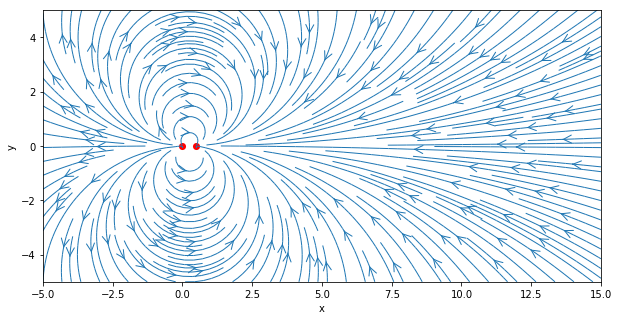

In [19]:
Q = 3
x_s = 0.5

u_quelle, v_quelle = source_v(X, Y, 0, 0, Q)   # Quellenströmung bei (0,0)
u_senke, v_senke = source_v(X, Y, x_s, 0, -Q)  # Senkenströmung bei (10,0)

u_gesamt = u_quelle + u_senke                  # lineare Überlagerung
v_gesamt = v_quelle + v_senke

plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,15)
plt.ylim(-5,5)
plt.streamplot(X, Y, u_gesamt, v_gesamt, 
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(0, 0, color='red', s=50, marker='o', linewidth=0)
plt.scatter(x_s, 0, color='red', s=50, marker='o', linewidth=0);

2) Über die Stromfunktion. Bei der Gelegenheit plotten wir auch gleich die Potentiallinien:

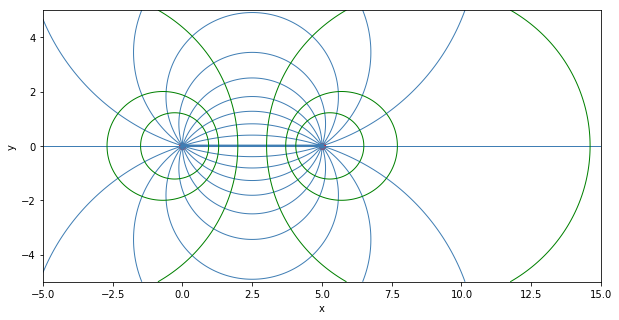

In [12]:
psi_quelle = source_psi(X, Y, 0, 0, Q)
psi_senke = source_psi(X, Y, x_s, 0, -Q)
psi_gesamt = psi_quelle + psi_senke

phi_quelle = source_phi(X, Y, 0, 0, Q)
phi_senke = source_phi(X, Y, x_s, 0, -Q)
phi_gesamt = phi_quelle + phi_senke

plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.contour(X, Y, psi_gesamt, 20,
            colors='#407eb4', linewidths=1, linestyles='solid')
plt.contour(X, Y, phi_gesamt, [-0.7, -0.5, -0.2, 0.2, 0.5, 0.7],
            colors='green', linewidths=1, linestyles='solid')

plt.scatter([0,x_s], [0,0], color='red', s=40, marker='o', linewidth=1);

#### Beispiel 2

In unserem zweiten Beispiel soll der Strömung aus Beispiel 1 eine Translationsströmung mit $0,3~ \text{m}/\text{s}$ in $x$-Richtung überlagert werden. Dazu definieren wir die Funktionen für das Geschwindigkeitsfeld sowie die Potential- und Stromfunktion:

In [13]:
def trans_v(x, y, u1, v1):       # der Geschwindigkeitsvek. der Translationsstr.
    return np.full_like(x, u1), np.full_like(y, v1)

def trans_psi(x, y, u1, v1):     # die Stromfunktion der Translationsströmung
    return -v1*x+u1*y 
        
def trans_phi(x, y, u1, v1):     # die Potentialfunktion der Translationsströmung
    return u1*x+v1*y

Die überlagerte Strömung ergibt sich wieder durch einfache Addition:

In [14]:
u1 = 0.3

u_trans, v_trans = trans_v(X, Y, u1, 0)    # Translationsströmung bei (0,0)
u_gesamt = u_quelle + u_senke + u_trans    # lineare Überlagerung
v_gesamt = v_quelle + v_senke + v_trans

psi_trans = trans_psi(X, Y, u1, 0)
psi_gesamt = psi_quelle + psi_senke + psi_trans

phi_trans = trans_phi(X, Y, u1, 0)
phi_gesamt = phi_quelle + +phi_senke + phi_trans

Wir berechnen noch die Staupunkte - also die Punkte, an denen die Geschwindigkeit gerade Null ist. Da die Quelle und Senke beide auf der $x$-Achse liegen und die Translationsströmung ebenfalls in $x$-Richtung strömt, muss der Staupunkt auch auf der $x$-Achse (Symmetrieachse) liegen. Um die $x$-Koordinate(n) zu finden, müssen wir die Nullstellen der folgenden Gleichung finden, die sich aus der Überlagerung der Geschwindigkeiten der einzelnen Elementarströmungen und Berücksichtigung von $y=y_s=y_q=x_q=0$ ergibt:

$$u = u_1 + \frac{Q}{2\pi x} - \frac{Q}{2\pi (x-x_s)} = 0$$

Eine Befragung von [WolframAlpha](http://www.wolframalpha.com) liefert für die $x$-Positionen des Staupunkts:

$$x_{1,2} = \frac{\pi x_s u_1 \pm \sqrt{\pi}\sqrt{2 Q x_s u_1 + \pi x_s^2 u_1^2}}{2\pi u_1}$$

Es gibt also zwei Staupunkte in dieser Strömung, die wir jetzt neben den Stromlinien in einem Diagramm darstellen wollen. Die *Staustromlinie*, die durch die Staupunkte verläuft tragen wir zusätzlich in rot ein, in dem wir die entsprechende Stromfunktion plotten:

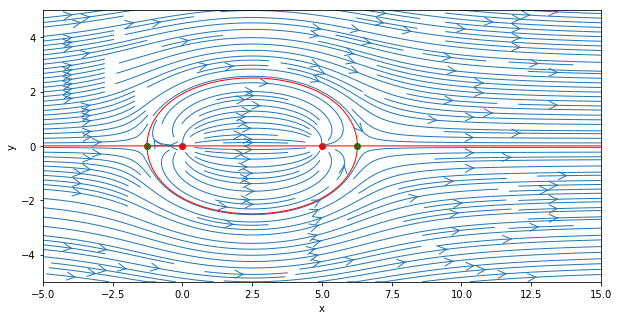

In [15]:
# Staupunkte berechnen
x_S1 = ((math.pi*x_s*u1 
        + math.sqrt(math.pi)*math.sqrt(2*Q*x_s*u1+math.pi*x_s**2*u1**2))
        / (2*math.pi*u1))
x_S2 = ((math.pi*x_s*u1 
        - math.sqrt(math.pi)*math.sqrt(2*Q*x_s*u1+math.pi*x_s**2*u1**2))
        / (2*math.pi*u1))

# Neuen Plot einrichten
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5,15)
plt.ylim(-5,5)
# Stromlinien mit Matplotlib-Funktion darstellen
plt.streamplot(X, Y, u_gesamt, v_gesamt, 
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
# Berechnete Staupunkte in grün einzeichnen
plt.scatter([x_S1, x_S2],[0,0], color='green', s=50, marker='o', linewidth=0);
# Zentren der Quelle und der Senke in rot eintragen
plt.scatter([0, x_s],[0,0], color='red', s=50, marker='o', linewidth=0);
# Staustromlinie in rot eintragen
cs = plt.contour(X, Y, psi_gesamt, levels=[0],
            colors='red', linewidths=1, linestyles='solid');

Wie man sieht, umschließt die Staustromlinie eine Form, die man als Festkörper interpretieren kann, wenn man die Staustromlinie als Wand deutet. Die oben gezeigte Form ist auch als *Rankine-Oval* bekannt.

#### Beispiel 3

Anhand der Strömung in Beispiel 2 soll die Druckverteilung auf dem Rankine-Oval mithilfe der Bernoulli-Gleichung berechnet werden. Hierzu benötigen wir zunächst die Koordinaten der Kontur des Rankine-Ovals, die wir aus der bereits berechneten Konturlinie (Staustromlinie) extrahieren (hier die obere Hälfte des Ovals):

In [16]:
kontur = cs.collections[0].get_paths()[0]
punkte = kontur.vertices
x_kontur = punkte[:,0]
y_kontur = punkte[:,1]

An den Koordinaten der Körperkontur berechnen wir dann die Geschwindigkeitskomponenten und den Betrag der Geschwindigkeit durch Addition der 3 Elementarströmungen (Quelle, Senke und Translationsströmung):

In [17]:
ua,va = source_v(x_kontur, y_kontur, 0, 0, Q)
ub,vb = source_v(x_kontur, y_kontur, x_s, 0, -Q) 
uc,vc = trans_v(x_kontur, y_kontur, u1, 0)
u_kontur = ua+ub+uc
v_kontur = va+vb+vc
v_abs = np.sqrt(u_kontur**2+v_kontur**2)

Die Druckverteilung erhalten wir schließlich über die Bernoulli-Gleichung, wobei wir den Beitrag durch die Schwerkraft vernachlässigen. Für den Umgebungsdruck setzen wir $p_\infty = 102300~\text{Pa}$, die Dichte ist $\rho = 1,2~ \text{kg/m}^3$. Die Anströmgeschwindigkeit entspricht der Geschwindigkeit der Translationsströmung.

$$p + \frac{\rho}{2}\cdot \overrightarrow{v}^2 = p_\infty + \frac{\rho}{2}\cdot \overrightarrow{v}_\infty^2 = const.$$



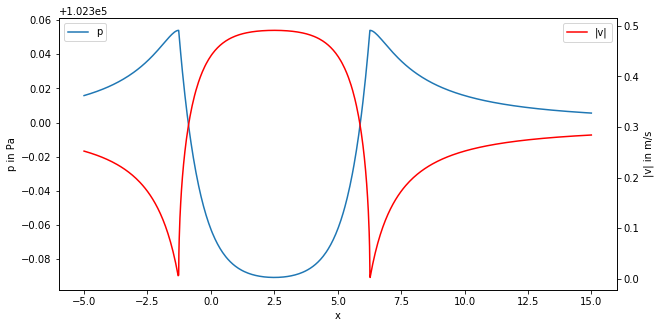

In [18]:
p = 102300 + 0.5 * 1.2 * (u1**2 - v_abs**2)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('x')
ax1.set_ylabel('p in Pa')
ax1.plot(x_kontur, p, label='p')
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.set_ylabel('|v| in m/s')
ax2.plot(x_kontur, v_abs, '-r', label='|v|')
ax2.legend(loc=1);

Wie erwartet, ist der Druck in den Staupunkten maximal und die Geschwindigkeit Null. Aufgrund der symmetrischen Umströmung, ist die Druckverteilung auf Ober- und Unterseite identisch, so dass keine resultierende Auftriebskraft auf den Körper wirkt. 

Da die Druckverteilung auch in $x$-Richtung symmetrisch ist und Reibungskräfte nicht berücksichtigt werden, wird auch die Kraft in $x$-Richtung gleich Null. 

Wie wir später noch sehen werden, ist die Potentialtheorie zwar gut geeignet, um Auftriebskräfte zu berechnen, die Reibungskräfte (Druckverluste) lassen sich damit allein jedoch nicht bestimmen. In der Praxis wird die Potentialtheorie deshalb häufig mit einem Grenzschichtrechenverfahren gekoppelt.

Im nächsten Kapitel folgen noch weitere wichtige Elementarströmungen, wie die Dipolströmung oder Potentialwirbel.


[Hier](2_3-Potentialtheorie_Elementarstroemungen2.ipynb) geht's weiter oder [hier](index.ipynb) zurück zur Übersicht.


---
###### Copyright (c) 2018, Florian Theobald und Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()